# Load data into Spark DataFrame

In [4]:
import os
exec(open(os.path.join(os.environ["SPARK_HOME"], 'python/pyspark/shell.py')).read())

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 2.3.0
      /_/

Using Python version 3.5.5 (default, Mar 12 2018 16:25:05)
SparkSession available as 'spark'.


In [5]:
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [6]:
from pyspark import SparkContext

In [7]:
import pyspark.sql.functions as F

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df = spark.read.csv('../data/event_ds.csv',header=True).cache()
df

DataFrame[uid: string, event: string, song_id: string, date: string]

In [10]:
df.show()

+---------+-----+--------+----------+
|      uid|event| song_id|      date|
+---------+-----+--------+----------+
|168542959|    P| 6124109|2017-03-30|
|168548032|    P|  896579|2017-03-30|
|168550948|    P|  277286|2017-03-30|
|168550949|    P|  360750|2017-03-30|
|168550716|    P| 1873326|2017-03-30|
|168547123|    P|       0|2017-03-30|
|168551120|    P|22858485|2017-03-30|
|168550329|    P| 3514083|2017-03-30|
|168548032|    P| 6684886|2017-03-30|
|168551589|    P| 1179220|2017-03-30|
|168550716|    P|  248323|2017-03-30|
|168551107|    P|23492688|2017-03-30|
|168543083|    P| 4403610|2017-03-30|
|168538321|    P|  794067|2017-03-30|
|168551245|    P| 1108426|2017-03-30|
|168551511|    P| 1179220|2017-03-30|
|168536737|    P|  380812|2017-03-30|
|168548044|    P| 7203846|2017-03-30|
|168551303|    P|23485496|2017-03-30|
|168548032|    P| 3243689|2017-03-30|
+---------+-----+--------+----------+
only showing top 20 rows



In [11]:
# create new or overwrite original field with withColumn
df = df.withColumn('date', F.col('date').cast('date'))
df

DataFrame[uid: string, event: string, song_id: string, date: date]

In [12]:
df.show()

+---------+-----+--------+----------+
|      uid|event| song_id|      date|
+---------+-----+--------+----------+
|168542959|    P| 6124109|2017-03-30|
|168548032|    P|  896579|2017-03-30|
|168550948|    P|  277286|2017-03-30|
|168550949|    P|  360750|2017-03-30|
|168550716|    P| 1873326|2017-03-30|
|168547123|    P|       0|2017-03-30|
|168551120|    P|22858485|2017-03-30|
|168550329|    P| 3514083|2017-03-30|
|168548032|    P| 6684886|2017-03-30|
|168551589|    P| 1179220|2017-03-30|
|168550716|    P|  248323|2017-03-30|
|168551107|    P|23492688|2017-03-30|
|168543083|    P| 4403610|2017-03-30|
|168538321|    P|  794067|2017-03-30|
|168551245|    P| 1108426|2017-03-30|
|168551511|    P| 1179220|2017-03-30|
|168536737|    P|  380812|2017-03-30|
|168548044|    P| 7203846|2017-03-30|
|168551303|    P|23485496|2017-03-30|
|168548032|    P| 3243689|2017-03-30|
+---------+-----+--------+----------+
only showing top 20 rows



# Some exploration

In [13]:
# simple count rows
df.count()

12392671

In [14]:
# select operation, count distinct rows
df.select('uid').distinct().count()

60003

In [15]:
# group by aggregation
df.groupBy('event').count().show()

+-----+--------+
|event|   count|
+-----+--------+
|    D|  647688|
|    S|  783461|
|    P|10961522|
+-----+--------+



In [16]:
# group by aggregation, more general (count, min, max, mean), multiple at once
df.groupBy('event').agg(
    F.count(F.col('uid')).alias('count'),
    F.max(F.col('uid')).alias('max_uid')
).show()

+-----+--------+--------+
|event|   count| max_uid|
+-----+--------+--------+
|    D|  647688|99800656|
|    S|  783461|99800656|
|    P|10961522|99800656|
+-----+--------+--------+



In [17]:
# filter operation
# group by aggregation
# order by operation
df.filter((F.col('date')>='2017-04-01') & (F.col('date')<='2017-04-05')) \
                    .groupBy('date','event').count() \
                    .orderBy('date','event').show()

+----------+-----+------+
|      date|event| count|
+----------+-----+------+
|2017-04-01|    D| 37624|
|2017-04-01|    P|491853|
|2017-04-01|    S| 33525|
|2017-04-02|    D| 26424|
|2017-04-02|    P|441405|
|2017-04-02|    S| 30417|
|2017-04-03|    D| 22478|
|2017-04-03|    P|253363|
|2017-04-03|    S| 27140|
|2017-04-04|    D| 20874|
|2017-04-04|    P|383015|
|2017-04-04|    S| 25092|
|2017-04-05|    D| 16258|
|2017-04-05|    P|308604|
|2017-04-05|    S| 20247|
+----------+-----+------+



In [39]:
date_count = df.groupBy('date').count().orderBy('date').toPandas()

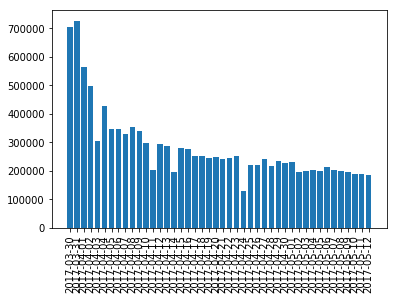

In [44]:
plt.bar(date_count['date'].astype(str), date_count['count'])
plt.xticks(rotation='vertical');

# Label definition

In [45]:
import datetime
from dateutil import parser

label_window_size = 14
label_window_end_date = parser.parse('2017-05-12').date()
label_window_start_date = label_window_end_date - datetime.timedelta(label_window_size - 1)
print('label window:', label_window_start_date,'~', 
      label_window_end_date,'days:', label_window_size)

feature_window_size = 30
feature_window_end_date = label_window_start_date - datetime.timedelta(1)
feature_window_start_date = feature_window_end_date - datetime.timedelta(feature_window_size - 1)
print('feature window:', feature_window_start_date,'~', 
      feature_window_end_date,'days:', feature_window_size)

label window: 2017-04-29 ~ 2017-05-12 days: 14
feature window: 2017-03-30 ~ 2017-04-28 days: 30


In [46]:
# all the uid we will model
df_model_uid = df.filter((F.col('date')>=feature_window_start_date) & 
                         (F.col('date')<=feature_window_end_date))\
                        .select('uid').distinct()
# active in label window (active label=0)
df_active_uid_in_label_window = df.filter((F.col('date')>=label_window_start_date) & 
                                          (F.col('date')<=label_window_end_date))\
                            .select('uid').distinct().withColumn('label', F.lit(0))

In [47]:
# prepare label data (churn label=1; active label=0)
df_label = df_model_uid.join(df_active_uid_in_label_window, on=['uid'],how='left')
df_label = df_label.fillna(1)

In [48]:
df_label.groupBy('label').count().show()

+-----+-----+
|label|count|
+-----+-----+
|    1|36472|
|    0|22221|
+-----+-----+



# Feature generation

In [56]:
# event_data in feature_window
df_feature_window = df.filter((F.col('date')>=feature_window_start_date) & 
                              (F.col('date')<=feature_window_end_date))

In [59]:
df_feature_window.count()

9534079

### Frequency features

##### method 1

In [61]:
# define a function to generate frequency features
def frequency_feature_generation(df, event, time_window, snapshot_date):
    """
    generate frequency features for one event type and one time window
    """
    df_feature = df.filter(F.col('event')==event)\
            .filter((F.col('date')>=snapshot_date-datetime.timedelta(time_window-1)) & 
                    (F.col('date')<=snapshot_date))\
            .groupBy('uid')\
            .agg(F.count(F.col('uid')).alias('freq_'+event+'_last_'+str(time_window)))
    return df_feature

In [62]:
# generate one feature
event = 'S'
time_window = 3
snapshot_date = feature_window_end_date
df_feature = frequency_feature_generation(df_feature_window, event, time_window, snapshot_date)

In [63]:
df_feature.show(5)

+---------+-------------+
|      uid|freq_S_last_3|
+---------+-------------+
|167756744|            2|
|167679692|            1|
|167677091|            1|
|168515885|            1|
|168443888|            5|
+---------+-------------+
only showing top 5 rows



In [64]:
# generate frequency features for all event_list, time_window_list
event_list = ['P','D','S']
time_window_list = [1,3,7,14,30]
df_feature_list = []
for event in event_list:
    for time_window in time_window_list:
        df_feature_list.append(frequency_feature_generation(df_feature_window,
                                                            event,time_window,snapshot_date))

In [24]:
df_feature_list

[DataFrame[uid: string, freq_P_last_1: bigint],
 DataFrame[uid: string, freq_P_last_3: bigint],
 DataFrame[uid: string, freq_P_last_7: bigint],
 DataFrame[uid: string, freq_P_last_14: bigint],
 DataFrame[uid: string, freq_P_last_30: bigint],
 DataFrame[uid: string, freq_D_last_1: bigint],
 DataFrame[uid: string, freq_D_last_3: bigint],
 DataFrame[uid: string, freq_D_last_7: bigint],
 DataFrame[uid: string, freq_D_last_14: bigint],
 DataFrame[uid: string, freq_D_last_30: bigint],
 DataFrame[uid: string, freq_S_last_1: bigint],
 DataFrame[uid: string, freq_S_last_3: bigint],
 DataFrame[uid: string, freq_S_last_7: bigint],
 DataFrame[uid: string, freq_S_last_14: bigint],
 DataFrame[uid: string, freq_S_last_30: bigint]]

##### method 2: too many dfs to join? do it another way

In [65]:
# define a function to generate frequency features for a list of time windows
# using when().otherwise(), and list comprehension trick!
def frequency_feature_generation_time_windows(df,event,time_window_list,snapshot_date):
    """
    generate frequency features for one event type and a list of time windows
    """
    df_feature = df \
        .filter(F.col('event')==event) \
        .groupBy('uid') \
        .agg(*[F.sum(F.when((F.col('date')>=snapshot_date-datetime.timedelta(time_window-1)) & 
                            (F.col('date')<=snapshot_date),1).otherwise(0))\
               .alias('freq_'+event+'_last_'+str(time_window)) \
                for time_window in time_window_list]
            )# *[] opens list and make them comma separated
    return df_feature

In [66]:
# generate one event type, all time windows 
event = 'S'
time_window_list = [1,3,7,14,30]
snapshot_date = feature_window_end_date
df_feature = frequency_feature_generation_time_windows(df_feature_window,
                                                       event,time_window_list,snapshot_date)
df_feature.show(5)

+---------+-------------+-------------+-------------+--------------+--------------+
|      uid|freq_S_last_1|freq_S_last_3|freq_S_last_7|freq_S_last_14|freq_S_last_30|
+---------+-------------+-------------+-------------+--------------+--------------+
|168036229|            1|            1|            1|             1|            54|
|167696079|            0|            0|            0|             4|            68|
|167576066|            0|            0|            0|             0|            12|
|167960002|            0|            0|            0|             5|            19|
|167927934|           12|           12|           12|           213|           757|
+---------+-------------+-------------+-------------+--------------+--------------+
only showing top 5 rows



In [67]:
# generate frequency features for all event_list, time_window_list
event_list = ['P','D','S']
time_window_list = [1,3,7,14,30]
df_feature_list = []
for event in event_list:
    df_feature_list.append(frequency_feature_generation_time_windows(df_feature_window,event,time_window_list,snapshot_date))


In [93]:
df_feature_list

[DataFrame[uid: string, freq_P_last_1: bigint, freq_P_last_3: bigint, freq_P_last_7: bigint, freq_P_last_14: bigint, freq_P_last_30: bigint],
 DataFrame[uid: string, freq_D_last_1: bigint, freq_D_last_3: bigint, freq_D_last_7: bigint, freq_D_last_14: bigint, freq_D_last_30: bigint],
 DataFrame[uid: string, freq_S_last_1: bigint, freq_S_last_3: bigint, freq_S_last_7: bigint, freq_S_last_14: bigint, freq_S_last_30: bigint]]

### Recency features

In [ ]:
# defined as days from last event
# can generate one feature for each type of event





### Profile features

In [69]:
df_play = spark.read.csv('../data/play_ds.csv',header=True)
df_play.show(5)

+---------+------+-------+----------+---------+-----------+
|      uid|device|song_id|      date|play_time|song_length|
+---------+------+-------+----------+---------+-----------+
|168542959|    ar|6124109|2017-03-30|      335|        336|
|168548032|    ip| 896579|2017-03-30|        8|        184|
|168550948|    ar| 277286|2017-03-30|      254|        254|
|168550949|    ar| 360750|2017-03-30|      249|        249|
|168550716|    ar|1873326|2017-03-30|       24|        234|
+---------+------+-------+----------+---------+-----------+
only showing top 5 rows



In [70]:
df_play_feature_window = df_play.filter((F.col('date')>=feature_window_start_date) & 
                                        (F.col('date')<=feature_window_end_date))
df_profile_tmp = df_play_feature_window.select('uid','device').distinct()

In [71]:
df_profile_tmp.groupBy('device').count().show()

+------+-----+
|device|count|
+------+-----+
|    ar|51058|
|    wp|    1|
|    ip| 7478|
+------+-----+



In [72]:
# check if one user has two devices
df_profile_tmp.count()

58537

In [73]:
df_profile_tmp.distinct().count()

58537

In [74]:
df_profile_tmp = df_profile_tmp.withColumn('device_type',
                                           F.when(F.col('device')=='ip',1).otherwise(2))
df_profile_tmp.groupBy('device_type').count().show()

+-----------+-----+
|device_type|count|
+-----------+-----+
|          1| 7478|
|          2|51059|
+-----------+-----+



In [75]:
df_profile = df_label.select('uid').join(df_profile_tmp.select('uid','device_type'),
                                         on='uid',how='left')
df_profile.groupBy('device_type').count().show()

+-----------+-----+
|device_type|count|
+-----------+-----+
|       null|  171|
|          1| 7478|
|          2|51059|
+-----------+-----+



### Total play time features

In [87]:
# Can you generate total song play time features (using play_ds data) for different time window
# using play data (need to clean play time first, play time may be negative in data)
df_total_play_time = df_play.filter((F.col('date')>=feature_window_start_date) & 
                                    (F.col('date')<=feature_window_end_date) &
                                    (F.col('play_time')>=0))\
                            .groupBy('uid')\
                            .agg(F.sum('play_time').alias('total_play_time'))


df_total_play_time.show()

+---------+---------------+
|      uid|total_play_time|
+---------+---------------+
| 81114900|         2100.0|
|168555996|         1542.0|
|168572740|          247.0|
|168576728|           86.0|
|168579030|          192.0|
|168580603|        10336.0|
|168613666|          349.0|
|168617129|          194.0|
|168618438|        12620.0|
|168587465|        27505.0|
|168623548|          199.0|
|168642448|        13230.0|
|168678690|          202.0|
|168678365|          250.0|
|168685416|          191.0|
|168685189|        44996.0|
|168686530|          250.0|
|168691192|         1689.0|
|168744871|        63195.0|
|168725175|         6774.0|
+---------+---------------+
only showing top 20 rows



### Fancier frequency features

In [98]:
# Can you generate counts of songs play 80% of their song length (using play_ds data) for different time window
# using play data (need to clean play time and song length first, play time may be negative in data, song length may be zeros)
df_song_play_80pct = df_play.filter((F.col('date')>=feature_window_start_date) & 
                                    (F.col('date')<=feature_window_end_date) &
                                    (F.col('play_time')>=0) & 
                                    (F.col('song_length')>0) &
                                    (F.col('play_time')>=0.8*F.col('song_length')))\
                            .groupBy('uid')\
                            .agg(F.count(F.col('uid')).alias('#song_play_80pct'))
                            
df_song_play_80pct.show(5)

+---------+----------------+
|      uid|#song_play_80pct|
+---------+----------------+
| 81114900|               8|
|168580603|              38|
|168618438|              46|
|168587465|              84|
|168642448|              50|
+---------+----------------+
only showing top 5 rows



In [103]:
def frequency_feature_generation_time_windows(df, time_window_list, snapshot_date):
    """
    generate frequency features for one event type and a list of time windows
    """
    df_feature = df.filter((F.col('date')>=feature_window_start_date) & 
                           (F.col('date')<=feature_window_end_date) &
                           (F.col('play_time')>=0) & 
                           (F.col('song_length')>0) &
                           (F.col('play_time')>=0.8*F.col('song_length')))\
        .groupBy('uid')\
        .agg(*[F.sum(F.when((F.col('date')>=snapshot_date-datetime.timedelta(time_window-1)) & 
                            (F.col('date')<=snapshot_date),1).otherwise(0))\
               .alias('#song_play_80pct_last_'+str(time_window)) \
                for time_window in time_window_list]
            )# *[] opens list and make them comma separated
    return df_feature

In [107]:
time_window_list = [1,3,7,14,30]
df_song_play_80pct = frequency_feature_generation_time_windows(df_play, 
                                                               time_window_list, 
                                                               snapshot_date)

In [109]:
df_song_play_80pct.show(5)

+---------+-----------------------+-----------------------+-----------------------+------------------------+------------------------+
|      uid|#song_play_80pct_last_1|#song_play_80pct_last_3|#song_play_80pct_last_7|#song_play_80pct_last_14|#song_play_80pct_last_30|
+---------+-----------------------+-----------------------+-----------------------+------------------------+------------------------+
| 81114900|                      0|                      0|                      0|                       0|                       8|
|168580603|                      0|                      0|                      0|                       0|                      38|
|168618438|                      0|                      0|                      0|                       0|                      46|
|168587465|                      0|                      0|                     10|                      19|                      84|
|168642448|                      0|                      0|   

# Form training data

In [81]:
def join_feature_data(df_master,df_feature_list):
    for df_feature in df_feature_list:
        df_master = df_master.join(df_feature,on='uid',how='left')
        #df_master.persist() # uncomment if number of joins is too many
    return df_master
    

In [111]:
# join all behavior features
df_model_final = join_feature_data(df_label, df_feature_list)

In [112]:
# join all profile features
df_model_final = join_feature_data(df_model_final,[df_profile, df_song_play_80pct])

In [113]:
df_model_final.show(1)

+---------+-----+-------------+-------------+-------------+--------------+--------------+-------------+-------------+-------------+--------------+--------------+-------------+-------------+-------------+--------------+--------------+-----------+-----------------------+-----------------------+-----------------------+------------------------+------------------------+
|      uid|label|freq_P_last_1|freq_P_last_3|freq_P_last_7|freq_P_last_14|freq_P_last_30|freq_D_last_1|freq_D_last_3|freq_D_last_7|freq_D_last_14|freq_D_last_30|freq_S_last_1|freq_S_last_3|freq_S_last_7|freq_S_last_14|freq_S_last_30|device_type|#song_play_80pct_last_1|#song_play_80pct_last_3|#song_play_80pct_last_7|#song_play_80pct_last_14|#song_play_80pct_last_30|
+---------+-----+-------------+-------------+-------------+--------------+--------------+-------------+-------------+-------------+--------------+--------------+-------------+-------------+-------------+--------------+--------------+-----------+-------------------

In [114]:
df_model_final.fillna(0).toPandas().to_csv('../data/df_model_final.csv',index=False)